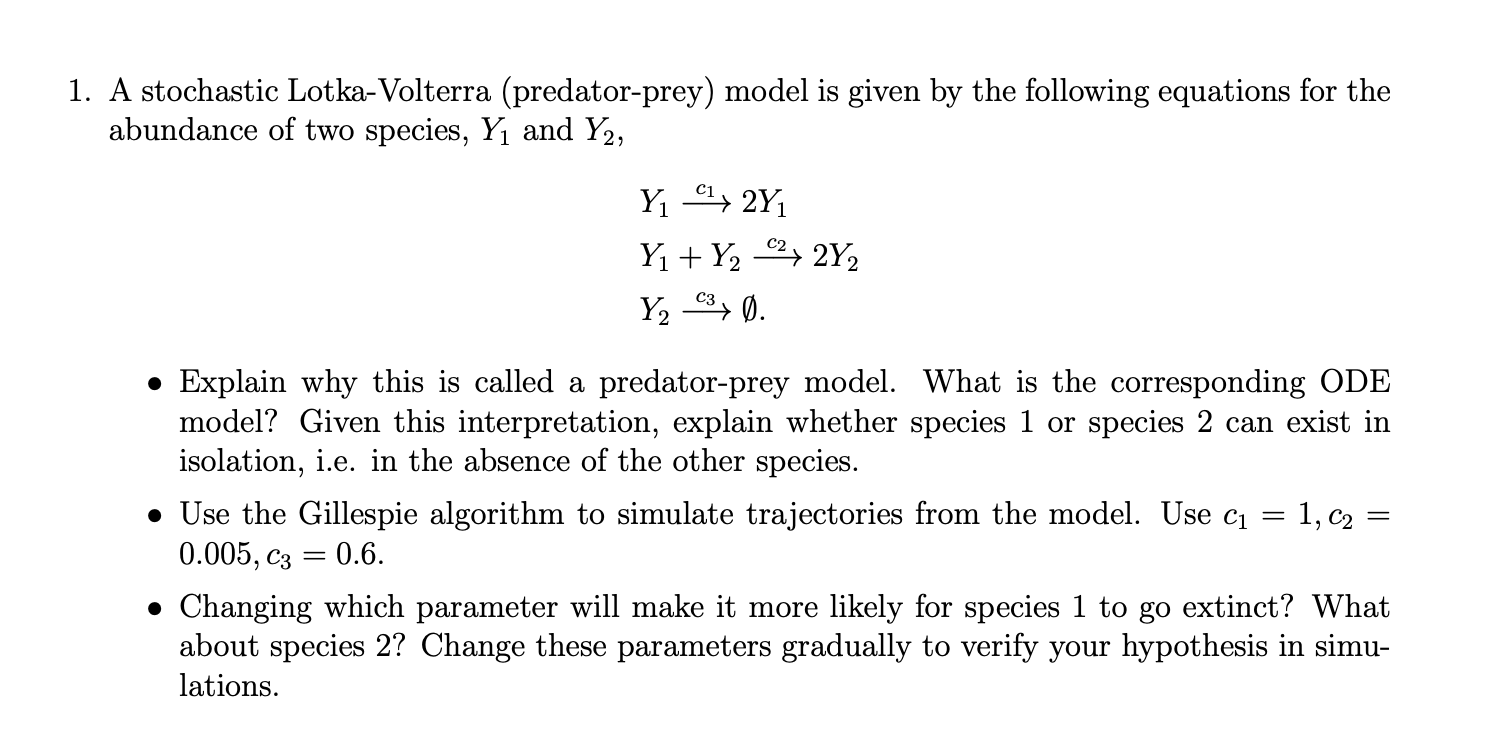 

**Gillespie algorithm for simulating the trajectories:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [8]:
def LotkaVolterra(X0, Y0, c1, c2, c3, max_steps, num_sim):
    X, Y, t = [X0], [Y0], [0]
    i = 0
    while i < max_steps:
        prop = [a1,a2,a3] = [c1*X[i], c2*X[i]*Y[i], c3*Y[i]]    # propensity functions
        v = [[1,0], [-1,1], [0,-1]]    #  reaction vectors
        par_sum = [sum(prop[:k]) for k in range(1,4)]    # partial sums of propensities
        if par_sum[-1] > 0:
            u1 = np.random.uniform(0,1)
            u2 = np.random.uniform(0,1)
            j = next(k for k, val in enumerate(par_sum) if val > u1*par_sum[-1])   # next reaction
            tau = -np.log(u2)/par_sum[-1]    # time to the next reaction
            t.append(t[i]+tau)   
            X.append(X[i]+v[j][0])
            Y.append(Y[i]+v[j][1])
        else:  
            t.append(t[i]+0.0001)
            X.append(X[i])
            Y.append(Y[i])
        i += 1
    return [X, Y, t]     

In [9]:
def Plots(X0, Y0, c1, c2, c3, max_steps, num_sim):
    fig, ax = plt.subplots(2, num_sim, figsize=(15,6))
    simulation = [LotkaVolterra(X0, Y0, c1, c2, c3, max_steps, j) for j in range(num_sim)]
    for i in range(num_sim):
        X = simulation[i][0]
        Y = simulation[i][1]
        t = simulation[i][2]
        ax[0,i].plot(t, X, label='1', color='cornflowerblue',alpha=1)
        ax[1,i].plot(t, Y, label='2', color='orange',alpha=1)
        ax[0,i].set_title('Simulation %i'%(i+1))
        ax[0,i].legend(['prey'], fontsize=12)
        ax[1,i].legend(['predator'], fontsize=12)
        ax[1,i].set_xlabel(r'time increments ($\tau$)')
        ax[0,0].set_ylabel('Y1 Concentration')
        ax[1,0].set_ylabel('Y2 Concentration')
        plt.tight_layout()   

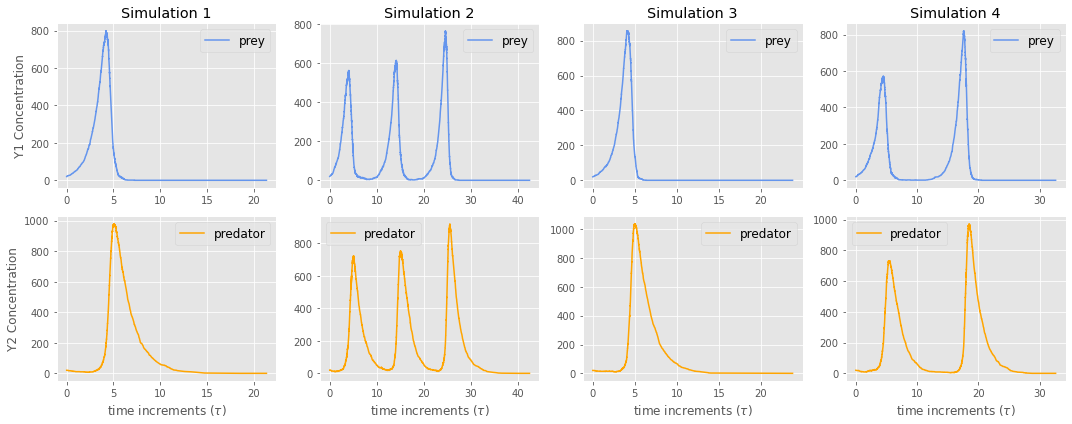

In [16]:
# Experiment1
X0, Y0 = 20, 20
[c1, c2, c3] = [1, 0.005, 0.6]
max_steps = 50000
num_sim = 4

Plots(X0, Y0, c1, c2, c3, max_steps, num_sim)  

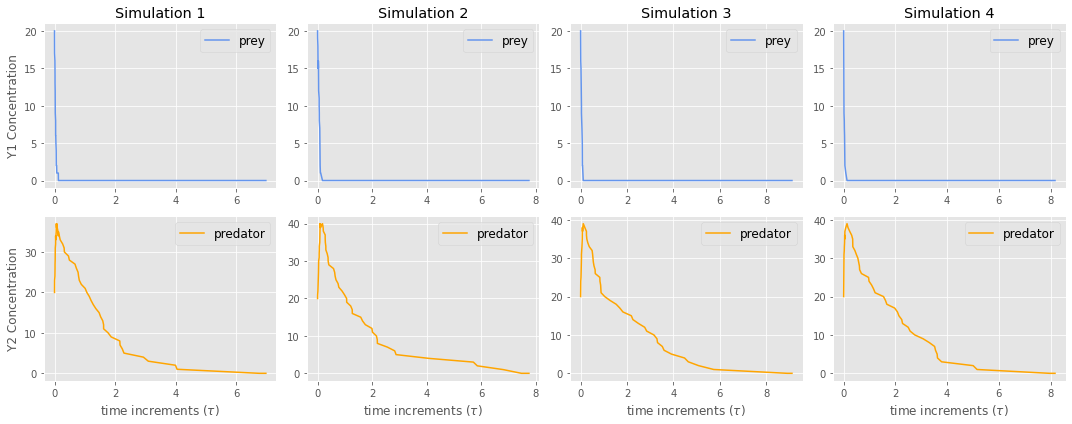

In [11]:
# Experiment2: high rate c2
X0, Y0 = 20, 20
[c1, c2, c3] = [1, 1, 0.6]
max_steps = 3000
num_sim = 4

Plots(X0, Y0, c1, c2, c3, max_steps, num_sim)  

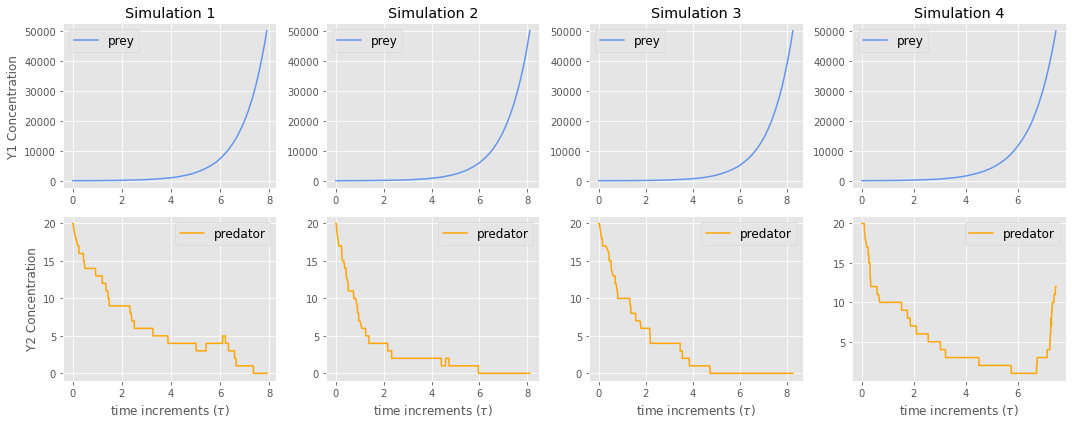

In [22]:
# Experiment3: low rate c2
X0, Y0 = 20, 20
[c1, c2, c3] = [1, 0.0001, 0.6]
max_steps = 50000
num_sim = 4

Plots(X0, Y0, c1, c2, c3, max_steps, num_sim) 

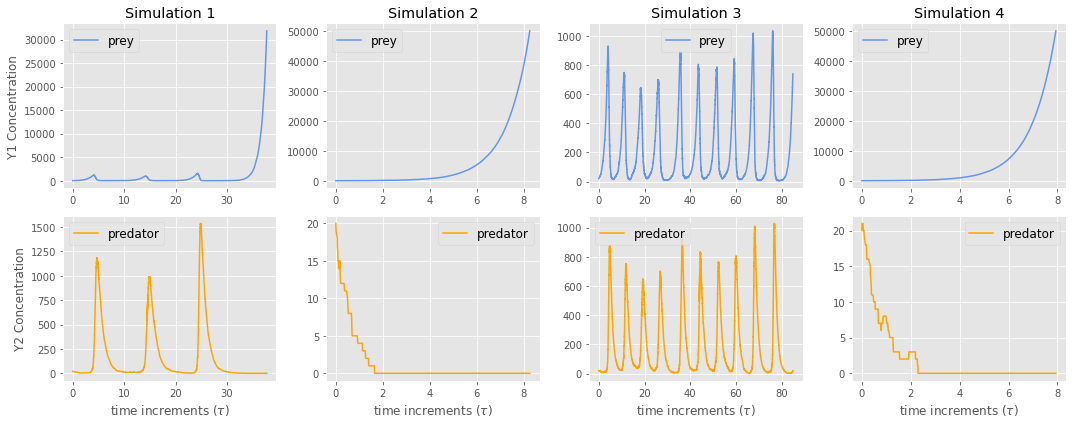

In [23]:
# Experiment4: high rate c3
X0, Y0 = 20, 20
[c1, c2, c3] = [1, 0.005, 1]
max_steps = 50000
num_sim = 4

Plots(X0, Y0, c1, c2, c3, max_steps, num_sim) 

**Question #2:** 
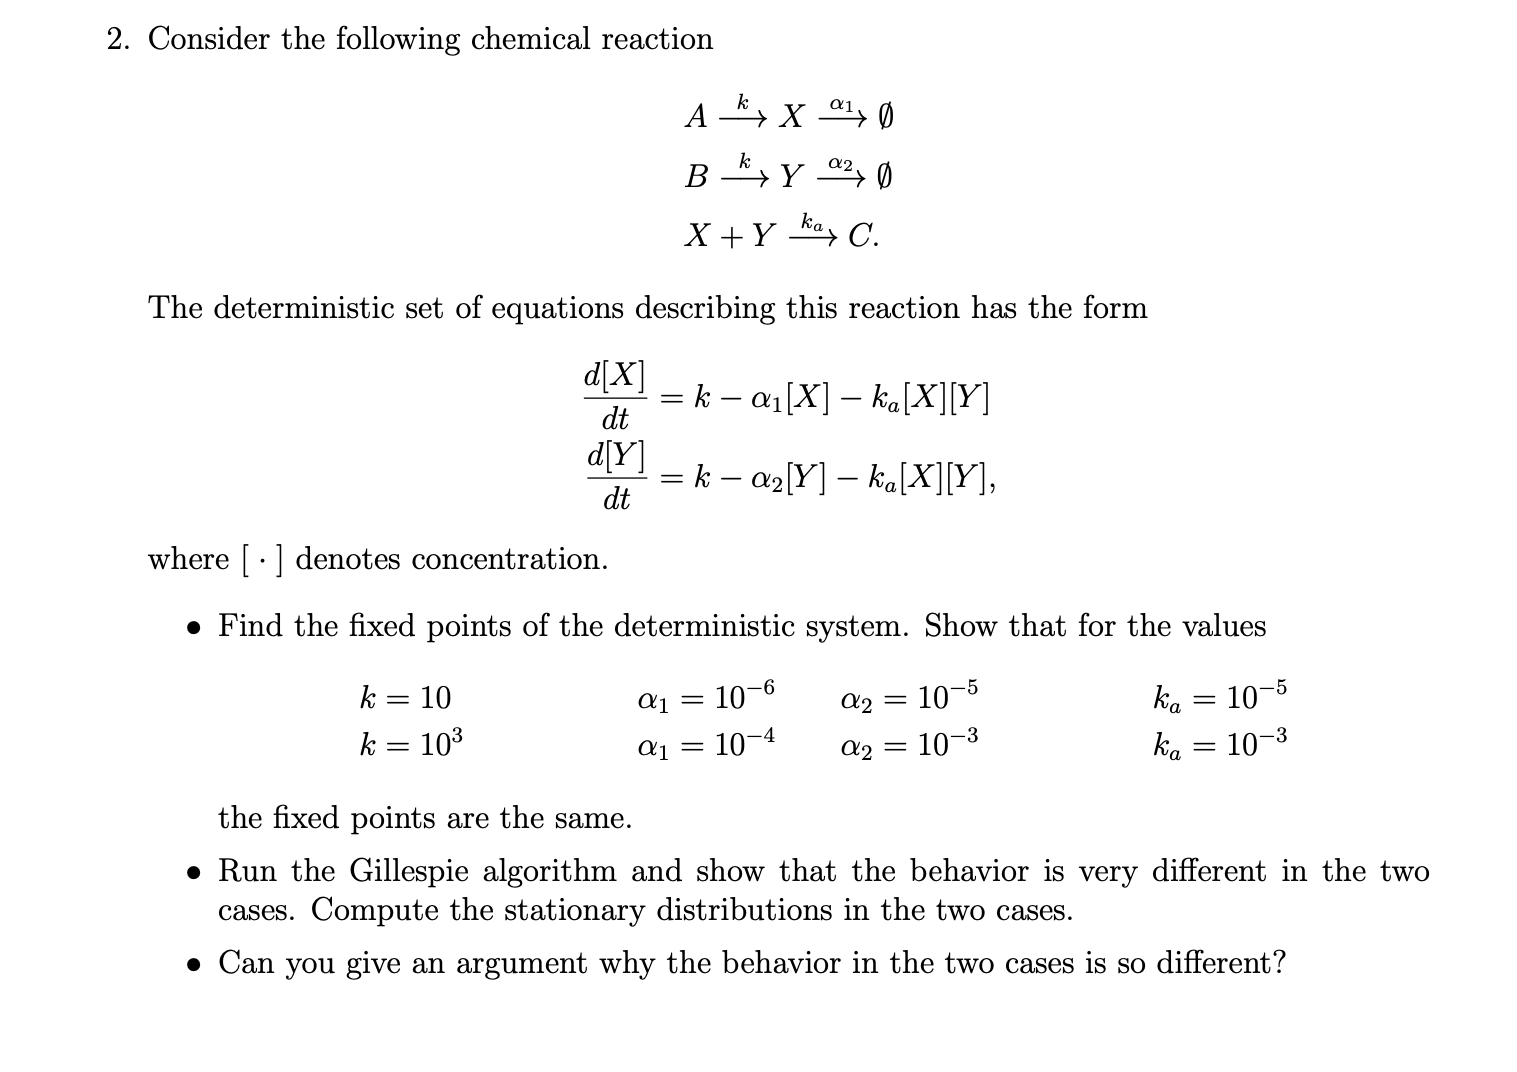

Fixed points are $X\approx3161.78$ and $Y\approx316.178$.

**Gillespie algorithm for simulating the trajectories using the first set of parameters:**


In [29]:
def SecondModel(X0, Y0, K, a1, a2, ka, max_steps):
    X, Y, t = [X0], [Y0], [0]
    i = 0
    while i < max_steps:
        prop = [K, ka*X[i]*Y[i], a1*X[i], a2*Y[i]]    # propensity functions
        v = [[1,1], [-1,-1], [-1,0], [0,-1]]    # reaction vectors
        par_sum = [sum(prop[:j]) for j in range(1,5)]    # partial sums of propensities
        u1 = np.random.uniform(0,1)
        u2 = np.random.uniform(0,1)
        j = next(k for k, val in enumerate(par_sum) if val > u1*par_sum[-1])    # next reaction
        tau = -np.log(u2)/par_sum[-1]    # time to the next reaction
        t.append(t[i]+tau)
        X.append(X[i]+v[j][0])
        Y.append(Y[i]+v[j][1])
        i += 1
    X_aver = np.mean(X, axis=0)  
    Y_aver = np.mean(Y, axis=0)
    t_aver = np.mean(t, axis=0) 
    return [X, Y, t, X_aver, Y_aver, t_aver]     

In [30]:
def Plots2(X0, Y0, K, a1, a2, ka, max_steps):
    fig, ax = plt.subplots(2, figsize=(15,6))
    [X, Y, t, Xmean, Ymean, tmean] = SecondModel( X0, Y0, K, a1, a2, ka, max_steps)
    ax[0].plot(t, X, label='1', color='cornflowerblue', alpha=1)
    ax[1].plot(t, Y, label='2', color='orchid', alpha=1)
    ax[0].legend(['X Concentration'])
    ax[1].legend(['Y Concentration'])
    ax[1].set_xlabel(r'time increments ($\tau$)')
    ax[0].set_ylabel('X Concentration')
    ax[1].set_ylabel('Y Concentration')
    plt.suptitle(r'Simulation of X and Y trajectory: $k=10,\alpha_1=10^{-6}'\
                 r',\alpha_2=10^{-5},k_a=10^{-5}$', y=1.05)
    plt.tight_layout()

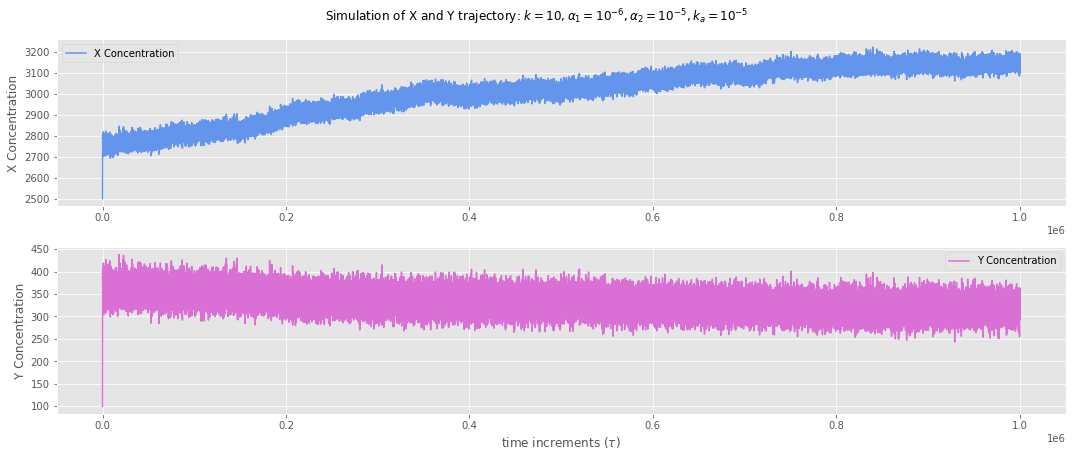

In [31]:
# Experiment1
X0, Y0 = 2500, 100
[K, a1, a2, ka] = [10, 10**-6, 10**-5, 10**-5]
max_steps = 2*10**7

Plots2(X0, Y0, K, a1, a2, ka, max_steps)

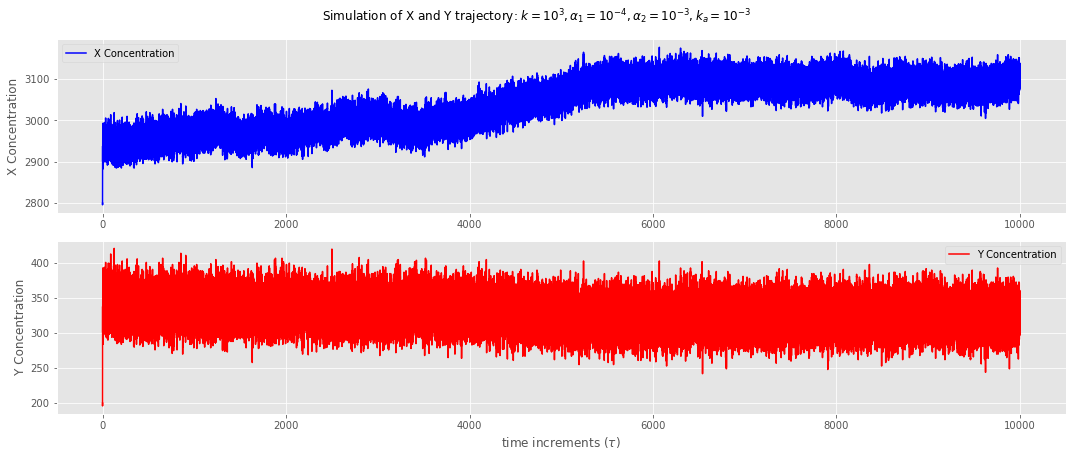

In [18]:
# Experiment2
X0, Y0 = 2800, 200
[K, a1, a2, ka] = [10**3, 10**-4, 10**-3, 10**-3]
max_steps = 2*10**7

Plots2(X0, Y0, K, a1, a2, ka, max_steps)

Both cases get closer to the fixed points $X\approx3161.78$ and $Y\approx316.178$ as we increase the number of steps. But In the second sets of plots we can see it goes to stationary much faster than the first case. The reason is that since $k$ has changed from $10$ to $10^3$, so the rate of producing $X$ and $Y$ has increased and hence at a fixed time $t$, the concentration $X(t)$ ( or $Y(t)$ ) in the second case is larger than $X(t)$ ( or $Y(t)$ ) in the first case ( more likely ).